# Báo cáo Project
Lớp TTNT-156727 , Nhóm G18

# Thông tin chung

### Thành viên
- Phạm Quốc Minh 20225743
- Nguyễn Thành Bách 20235660
- Trịnh Hữu An 20225593
- Lê Bá Ngọc Hiểu 20225627

# Bài toán
                      
                        **:Game Pacman:** 👻                           

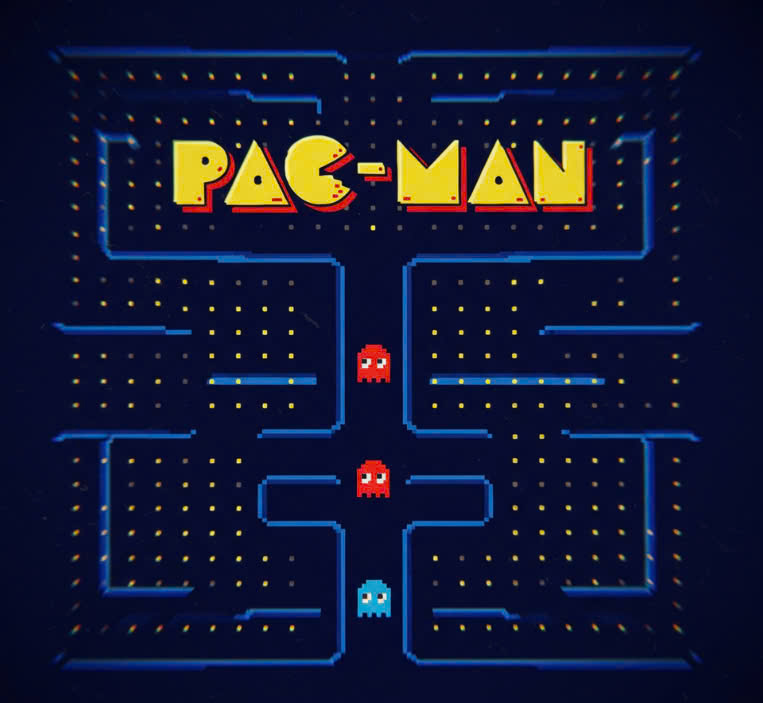

*Trong trò chơi này PACMAN sẽ **tự động** tìm thức ăn bằng các thuật toán được cài đặt sẵn với môi trường là một mê cung được khởi tạo gồm có tường , food và sẽ có các GHOST truy đuổi với thuật toán được chọn.*

###**Luật lệ trò chơi**
* Ghost và Pacman sẽ di chuyển từng bước ( được xác định bằng thuật toán được chọn ).Ghost sẽ di chuyển trước.
*  PACMAN khi di chuyển mỗi bước thì score sẽ -1 và khi ăn được FOOD thì score sẽ + 50
*  PACMAN sẽ chiến thắng khi ăn hết food trong mê cung và thua cuộc khi score =-15 hoặc va chạm với GHOST.

## **MỤC TIÊU**
Triển khai và đánh giá hiệu quả của các thuật toán Trí Tuệ Nhân Tạo (AI) khác nhau trong việc điều khiển hành vi của nhân vật Pacman và các đối thủ Ghosts trong môi trường trò chơi Pacman.

# **Phương pháp**
*  Ta sẽ lần lượt lựa chọn các thuật toán di chuyển cho 2 tác tử là PACMAN và GHOST để đối đầu nhau trên 5 map khác nhau rồi từ đó thống kê điểm số.
*  Để kết quả trực quan thì mỗi map sẽ đều có 18 FOOD và 2 GHOST.







Đối với GHOST ta sẽ có lựa chọn 3 phương pháp di chuyển

*  **No Moving**: Ghosts đứng yên tại vị trí ban đầu, làm chuẩn so sánh cơ bản cho các thuật toán phức tạp hơn.

*  **Random Move**: Ghosts di chuyển ngẫu nhiên mỗi bước, tạo yếu tố bất ngờ và khó đoán cho Pacman.
* **A\***: Thuật toán tìm kiếm đường đi tối ưu dựa trên heuristic, giúp Ghosts truy đuổi PACMAN một cách hiệu quả.



Đối với PACMAN ta cũng sẽ có 3 lựa chọn thuật toán di chuyển

*   **BFS**: Duyệt các trạng thái theo mức, đảm bảo tìm ra giải pháp nông nhất nếu tồn tại.
*   **Local Search**: Tối ưu hóa nước đi hiện tại bằng cách khám phá các trạng thái lân cận.
*   **MiniMax**: Một thuật toán  cơ bản trong lý thuyết trò chơi đối kháng hai người. Pacman (người chơi MAX) sẽ cố gắng tối đa hóa điểm số của mình, trong khi dự đoán rằng Ghosts (người chơi MIN) sẽ cố gắng tối thiểu hóa điểm số của Pacman.



# **Chi tiết phương pháp**

### A*

Cách thức thực hiện:
1. Duy trì một tập các nút mở và tập các nút đã đóng.
2. Sử dụng hàm heuristic (h) để ước tính chi phí từ một nút đến mục tiêu. Trong trường hợp này, heuristic là khoảng cách từ Ghost đến Pacman.
3. Tính toán các giá trị gScore (chi phí từ điểm bắt đầu đến nút hiện tại) và fScore (fScore = gScore + h).
4. Tại mỗi bước, chọn nút có fScore nhỏ nhất từ openSet.
5. Nếu nút hiện tại là mục tiêu, tái tạo đường đi.
6. Xét các nút lân cận, cập nhật gScore và fScore nếu tìm được đường đi tốt hơn.

In [ ]:
def Ghost_move_A_star(_map, start_row, start_col, end_row, end_col, N, M):
    visited = [[False for _ in range(M)] for _ in range(N)]
    trace = {}
    cost = {}
    path = []
    queue = PriorityQueue()

    start = (start_row, start_col)
    end = (end_row, end_col)

    cost[start] = 0
    queue.put((Manhattan(start_row, start_col, end_row, end_col), start))

    while not queue.empty():
        current = queue.get()[1]
        visited[current[0]][current[1]] = True
        if current == end:
            path.append([current[0], current[1]])
            while current != start:
                current = trace[current]
                path.append([current[0], current[1]])
            path.reverse()
            return path[1] if len(path) > 1 else [start_row, start_col]

        for [d_r, d_c] in moving:
            new_row, new_col = current[0] + d_r, current[1] + d_c
            if isWall(_map, new_row, new_col, N, M) and not visited[new_row][new_col]:
                group = (new_row, new_col)
                cost[group] = cost[current] + 1
                queue.put((cost[group] + Manhattan(new_row, new_col, end_row, end_col), group))
                trace[group] = current

    return [start_row, start_col]

### BFS

Cách thức thực hiện:
1. Duy trì một queue để lưu các trạng thái cần xét.
2. Đánh dấu các ô đã đi qua để tránh lặp lại.
3. Tìm thức ăn gần nhất.
4. Lần lượt xét các ô lân cận, thêm vào hàng đợi nếu là ô hợp lệ và chưa được thăm.
5. Truy vết đường đi từ điểm đầu đến thức ăn khi tìm thấy.

In [ ]:

def BFS(_map, food_positions, start_row, start_col, N, M):
    visited = [[False for _ in range(M)] for _ in range(N)] # Khởi tạo mảng đánh dấu đã thăm
    trace = [[[-1, -1] for _ in range(M)] for _ in range(N)]# Mảng trace lưu vị trí cha của từng ô trong đường đi, khởi tạo (-1, -1)

    # Tìm thức ăn gần nhất so với vị trí bắt đầu
    [food_row, food_col, index] = find_nearest_food(food_positions, start_row, start_col)

    if food_row == -1:
        return []

    lt = []
    chk = False
    visited[start_row][start_col] = True
    lt.append([start_row, start_col])
    while len(lt) > 0:
        [row, col] = lt.pop(0)

        if row == food_row and col == food_col:
            chk = True
            break

        for i in range(4): # Duyệt 4 hướng lân cận
            new_row = row + moving[i][0]
            new_col = col + moving[i][1]
            if isValid(_map, new_row, new_col, N, M) and not visited[new_row][new_col]:
                visited[new_row][new_col] = True
                trace[new_row][new_col] = [row, col]
                lt.append([new_row, new_col])

    if not chk: # Nếu không tìm được đường đi đến food
        # Loại food khỏi danh sách để tìm food khác gần hơn
        food_positions.pop(index)
        return BFS(_map, food_positions, start_row, start_col, N, M)
    # Khởi tạo kết quả đường đi, bắt đầu từ vị trí food
    result = [[food_row, food_col]]
    [row, col] = trace[food_row][food_col]
    while row != -1:
        # Chèn từng vị trí vào đầu danh sách kết quả
        result.insert(0, [row, col])
        [row, col] = trace[row][col]
    # Trả về đường đi tìm được từ start đến food gần nhất
    return result

### Local Search

Cách thức thực hiện:
1. Pacman chỉ nhìn thấy các ô trong bán kính 3 bước.
2. Dùng Depth-Limited Search (DLS) với depth = 3 để quét và đánh giá (cộng/trừ điểm) quanh vị trí hiện tại.
3. Mỗi ô có hai giá trị chính:
* $h(n)$: tổng điểm do thấy thức ăn (+) hay gần Ghost (-).
* $v(n)$: số lần đã đi qua (penalty để tránh lặp).
4. Chọn ô kế tiếp có giá trị $f(n)=h(n)-v(n)$ lớn nhất.

In [ ]:
def update_cost(_map, pos, current_pos, N, M, depth, visited, object_type, cost):
    """Cập nhật điểm số cho các ô dựa trên loại đối tượng và khoảng cách"""
    start_row, start_col = pos
    current_row, current_col = current_pos
    visited.append((current_row, current_col))

    if depth < 0 or pos == current_pos:
        return

    # Tính điểm dựa vào loại đối tượng và khoảng cách
    point = 0
    if object_type == FOOD:
        if depth == 2 :
            point = 40
        elif depth == 1 :
            point =15
        else:
            point =5

    elif object_type == MONSTER:
        if depth == 2:
            point = float("-inf")
        if depth == 1:
            point = float("-inf")
        if depth == 0:
            point = -100

    cost[current_row][current_col] += point

    # Lan truyền ảnh hưởng đến các ô lân cận
    for d_r, d_c in moving:
        new_row, new_col = current_row + d_r, current_col + d_c
        if isWall(_map, new_row, new_col, N, M) and (new_row, new_col) not in visited:
            update_cost(_map, pos, (new_row, new_col), N, M, depth - 1, visited.copy(), object_type, cost)


def scan_surroundings(_map, pos, current_pos, N, M, depth, visited, cost, visited_penalty):
    """Quét xung quanh để tìm thức ăn và quái vật, cập nhật điểm số"""
    start_row, start_col = pos
    current_row, current_col = current_pos
    visited.append((current_row, current_col))

    if depth <= 0:
        return

    # Khám phá các hướng có thể đi
    for d_r, d_c in moving:
        new_row, new_col = current_row + d_r, current_col + d_c
        if isWall(_map, new_row, new_col, N, M) and (new_row, new_col) not in visited:
            # Nếu gặp thức ăn hoặc quái vật, lan truyền ảnh hưởng
            object_pos = (new_row, new_col)
            if _map[new_row][new_col] == FOOD:
                update_cost(_map, pos, object_pos, N, M, 2, [], FOOD, cost)
            elif _map[new_row][new_col] == MONSTER:
                update_cost(_map, pos, object_pos, N, M, 2, [], MONSTER, cost)

            # Tiếp tục khám phá sâu hơn
            scan_surroundings(_map, pos, object_pos, N, M, depth - 1, visited.copy(), cost, visited_penalty)

    # Trừ điểm các ô đã đi qua trước đó
    cost[current_row][current_col] -= visited_penalty[current_row][current_col]


def local_search(_map, start_row, start_col, N, M, visited_penalty):
    """Tìm bước đi tiếp theo tốt nhất cho Pacman"""
    cost = [[0 for _ in range(M)] for _ in range(N)]
    visited = []

    # Quét và đánh giá các ô xung quanh
    scan_surroundings(_map, (start_row, start_col), (start_row, start_col), N, M, 3, visited, cost, visited_penalty)

    # Tìm ô kề có điểm cao nhất
    max_score = float("-inf")
    best_move = []

    for d_r, d_c in moving:
        new_row, new_col = start_row + d_r, start_col + d_c
        if _map[new_row][new_col] != WALL and cost[new_row][new_col] > max_score:
            max_score = cost[new_row][new_col]
            best_move = [new_row, new_col]

    return best_move

### MiniMax

Cách thức thực hiện:
1. Mô hình trò chơi tối đa hoá: Pacman (maximizing) vs. Ghost (minimizing).
2. Xây dựng cây trò chơi tới độ sâu depth = 4, luân phiên hàm min_value và max_value.(Ghost đi trước)
3. Hàm terminal kiểm tra kết thúc (hết thức ăn, depth = 0, hoặc Pacman bị bắt).
4. Hàm evaluation tính heuristic:
$$
\text{score} = \text{currentScore}
+ \frac{W_F}{\max(1, d_{\text{food}})}
+ \sum_{k=0}^{n} \frac{W_G}{d_{\text{ghost}_k}}
$$
với $W_F=10$, $W_G=-15$.

In [ ]:
from Utils.Utils import *
from Constants.constants import *

_food_pos = []

_food_pos = []


def evaluationFunction(_map, pac_row, pac_col, N, M, score):
    # get food position
    ghost_pos = []
    distancesToFoodList = []
    for row in range(N):
        for col in range(M):
            if _map[row][col] == FOOD:
                distancesToFoodList.append(Manhattan(row, col, pac_row, pac_col))
            if _map[row][col] == MONSTER:
                ghost_pos.append([row, col])
            if _map[row][col] == EMPTY:
                score += 5

    # Consts
    INF = 100000000.0  # Infinite value
    WEIGHT_FOOD = 10.0  # Trọng số Food
    WEIGHT_GHOST = -15.0  # Trọng số GHOST

    _score = score
    if len(distancesToFoodList) > 0:
        _score += WEIGHT_FOOD / (min(distancesToFoodList) if min(distancesToFoodList) != 0 else 1)
    else:
        _score += WEIGHT_FOOD

    for [g_r, g_c] in ghost_pos:
        distance = Manhattan(pac_row, pac_col, g_r, g_c)
        if distance > 0:
            _score += WEIGHT_GHOST / distance
        else:
            return -INF

    return _score

def terminal(_map, _pac_row, _pac_col, _N, _M, _depth) -> bool:
        if _map[_pac_row][_pac_col] == MONSTER or _depth == 0:
            return True

        for row in range(_N):
            for col in range(_M):
                if _map[row][col] == FOOD:
                    return False

        return True
def minimaxAgent(_map, pac_row, pac_col, N, M, depth, Score):
    def max_value(_map, _pac_row, _pac_col, _N, _M, _depth, score, alpha, beta):
        if terminal(_map, _pac_row, _pac_col, _N, _M, _depth):
            return evaluationFunction(_map, _pac_row, _pac_col, _N, _M, score)

        v = -10000000000000000
        for [_d_r, _d_c] in moving:
            _new_r, _new_c = _pac_row + _d_r, _pac_col + _d_c
            if isValid(_map, _new_r, _new_c, _N, _M):
                state = _map[_new_r][_new_c]
                _map[_new_r][_new_c] = EMPTY
                if state == FOOD:
                    score += 20
                    _food_pos.pop(_food_pos.index((_new_r, _new_c)))
                else:
                    score -= 1
                v = max(v, min_value(_map, _new_r, _new_c, _N, _M, _depth - 1, score, alpha, beta))
                _map[_new_r][_new_c] = state
                if state == FOOD:
                    score -= 20
                    _food_pos.append((_new_r, _new_c))
                else:
                    score += 1
                # Alpha-beta pruning
                alpha = max(alpha, v)
                if beta <= alpha:
                    break
        return v

    def min_value(_map, _pac_row, _pac_col, _N, _M, _depth, score, alpha, beta):
        if terminal(_map, _pac_row, _pac_col, _N, _M, _depth):
            return evaluationFunction(_map, _pac_row, _pac_col, _N, _M, score)

        v = 10000000000000000
        for row in range(_N):
            for col in range(_M):
                if _map[row][col] == MONSTER:
                    for [_d_r, _d_c] in moving:
                        _new_r, _new_c = _d_r + row, _d_c + col
                        if isValid(_map, _new_r, _new_c, _N, _M):
                            state = _map[_new_r][_new_c]
                            _map[_new_r][_new_c] = MONSTER
                            _map[row][col] = EMPTY
                            v = min(v, max_value(_map, _pac_row, _pac_col, _N, _M, _depth - 1, score, alpha, beta))
                            _map[_new_r][_new_c] = state
                            _map[row][col] = MONSTER
                            # Alpha-beta pruning
                            beta = min(beta, v)
                            if beta <= alpha:
                                break
        return v

    res = []
    global _food_pos
    _food_pos = []
    for _row in range(N):
        for _col in range(M):
            if _map[_row][_col] == FOOD:
                _food_pos.append((_row, _col))

    for [d_r, d_c] in moving:
        new_r, new_c = pac_row + d_r, pac_col + d_c
        if isValid(_map, new_r, new_c, N, M):
            _state = _map[new_r][new_c]
            _map[new_r][new_c] = EMPTY
            if _state == FOOD:
                Score += 20
                _food_pos.pop(_food_pos.index((new_r, new_c)))
            else:
                Score -= 1
            # Initialize alpha and beta for the first call
            res.append(([new_r, new_c], min_value(_map, new_r, new_c, N, M, depth, Score, -10000000000000000, 10000000000000000)))
            _map[new_r][new_c] = _state
            if _state == FOOD:
                Score -= 20
                _food_pos.append((new_r, new_c))
            else:
                Score += 1

    res.sort(key=lambda k: k[1])
    if len(res) > 0:
        return res[-1][0]
    return []



# **Xây dựng chương trình**
Trong quá trình thực hiện project, nhóm đã cài đặt thử nghiệm các thuật toán ở trên cũng như xây dựng một giao diện đồ họa sử dụng [Pygame](https://www.pygame.org) để biểu diễn trực quan cho trò chơi.

Mã nguồn đầy đủ: https://github.com/Carbon2301/Pacman



## Một số hình ảnh minh họa

*Hình 1:* Màn hình chính của trò chơi

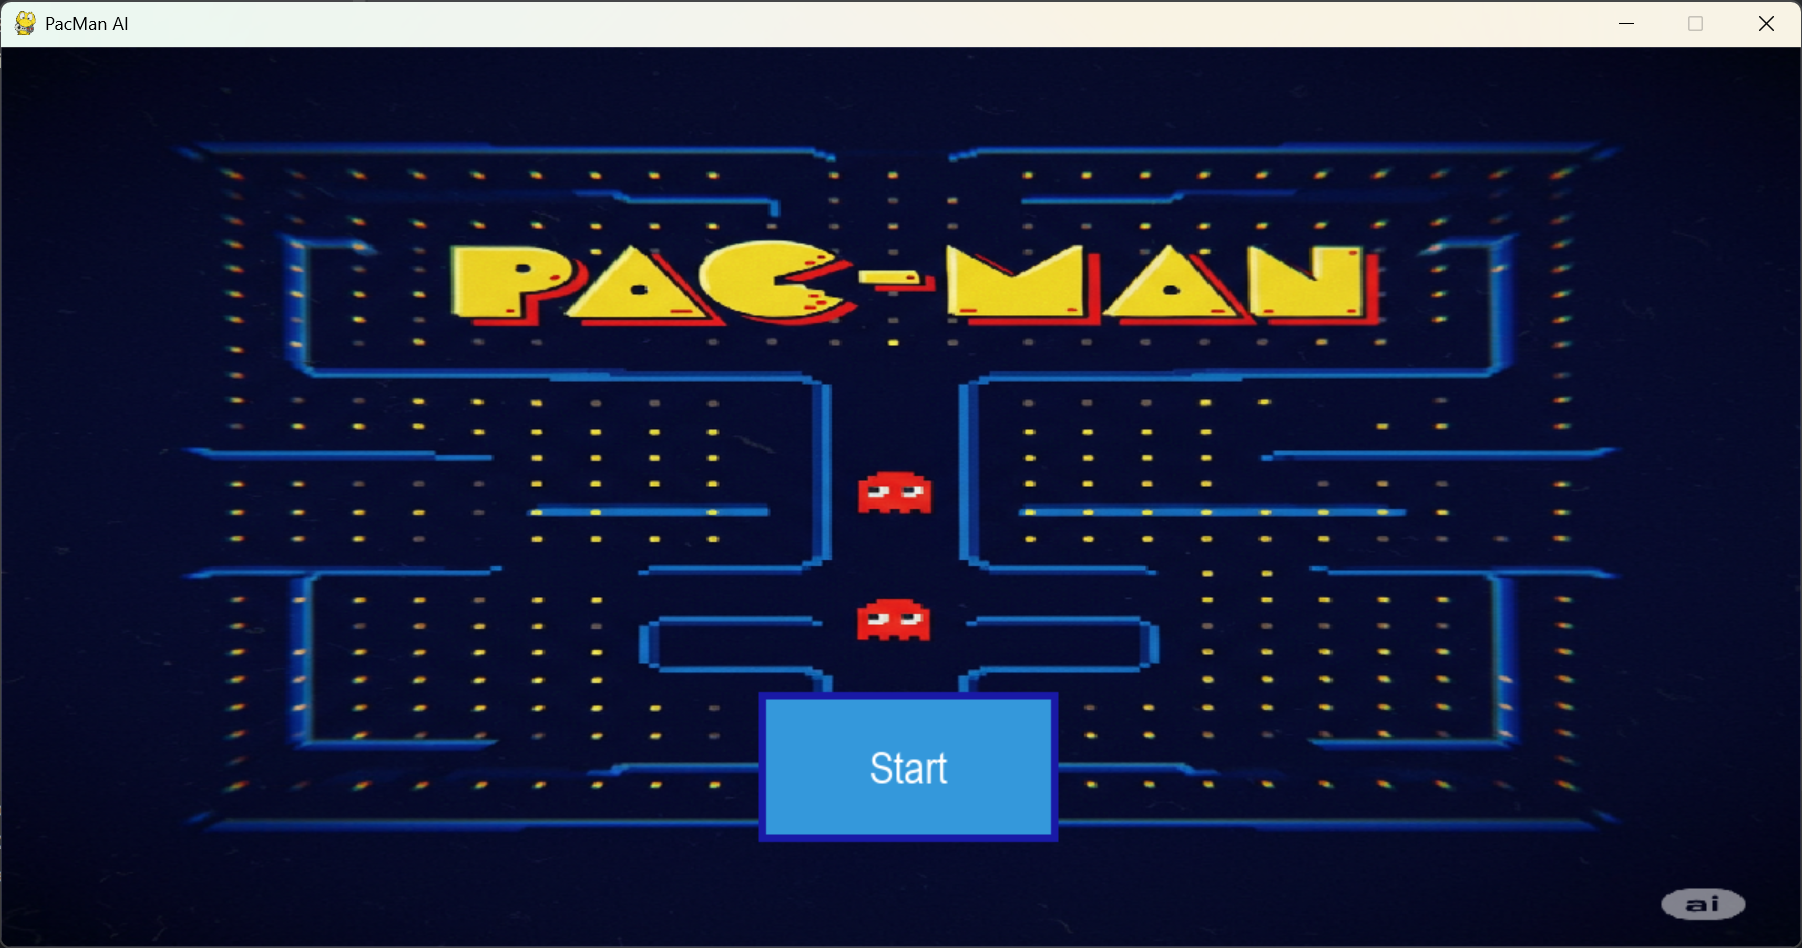

*Hình 2:* Menu tùy chọn khi bắt đầu trò chơi, cho phép người dùng chọn thuật toán của Ghost và PacMan.

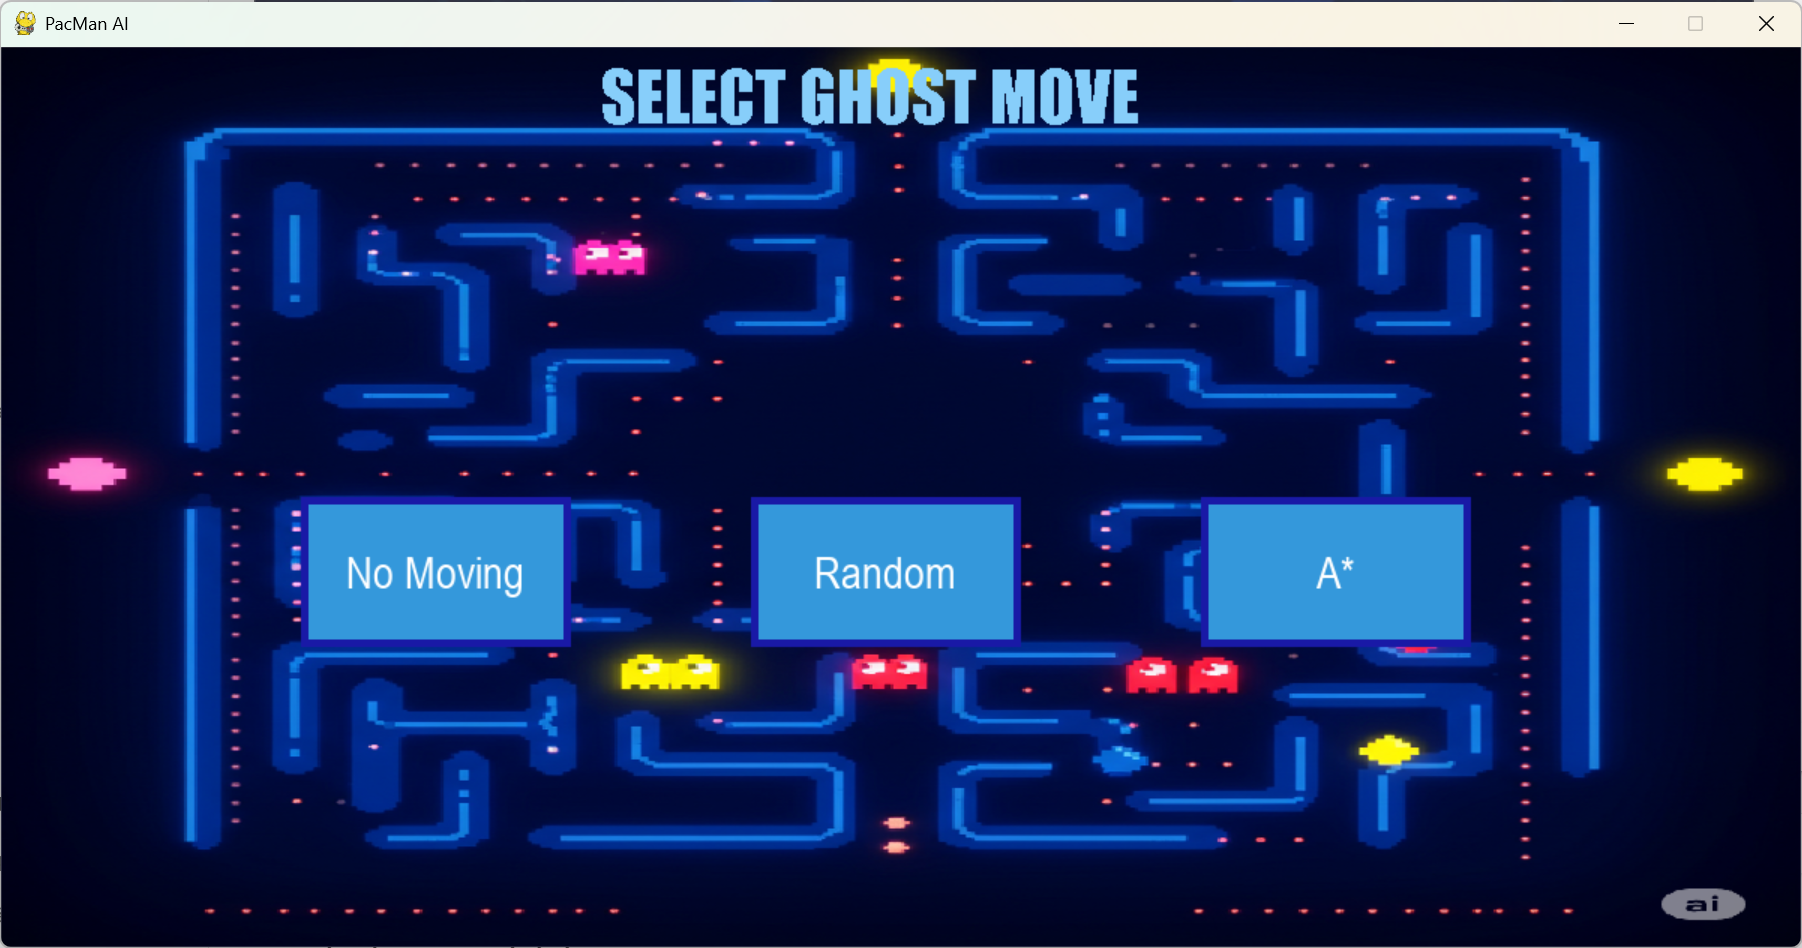

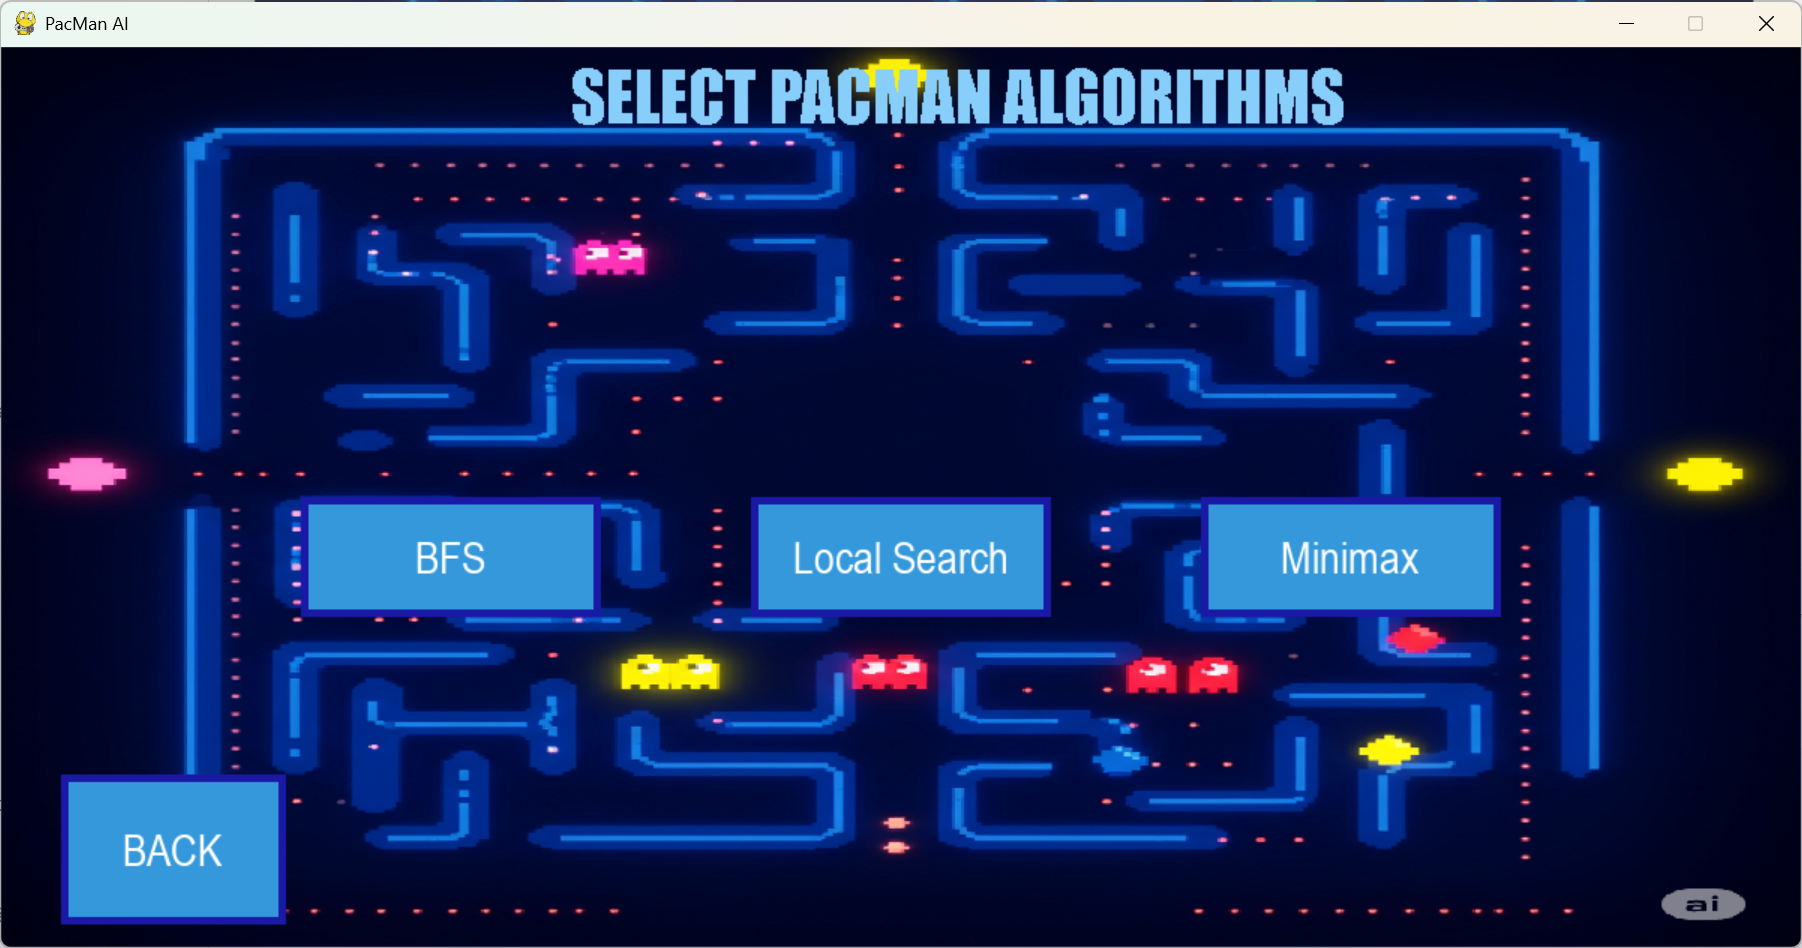

*Hình 3*: Chơi trò chơi

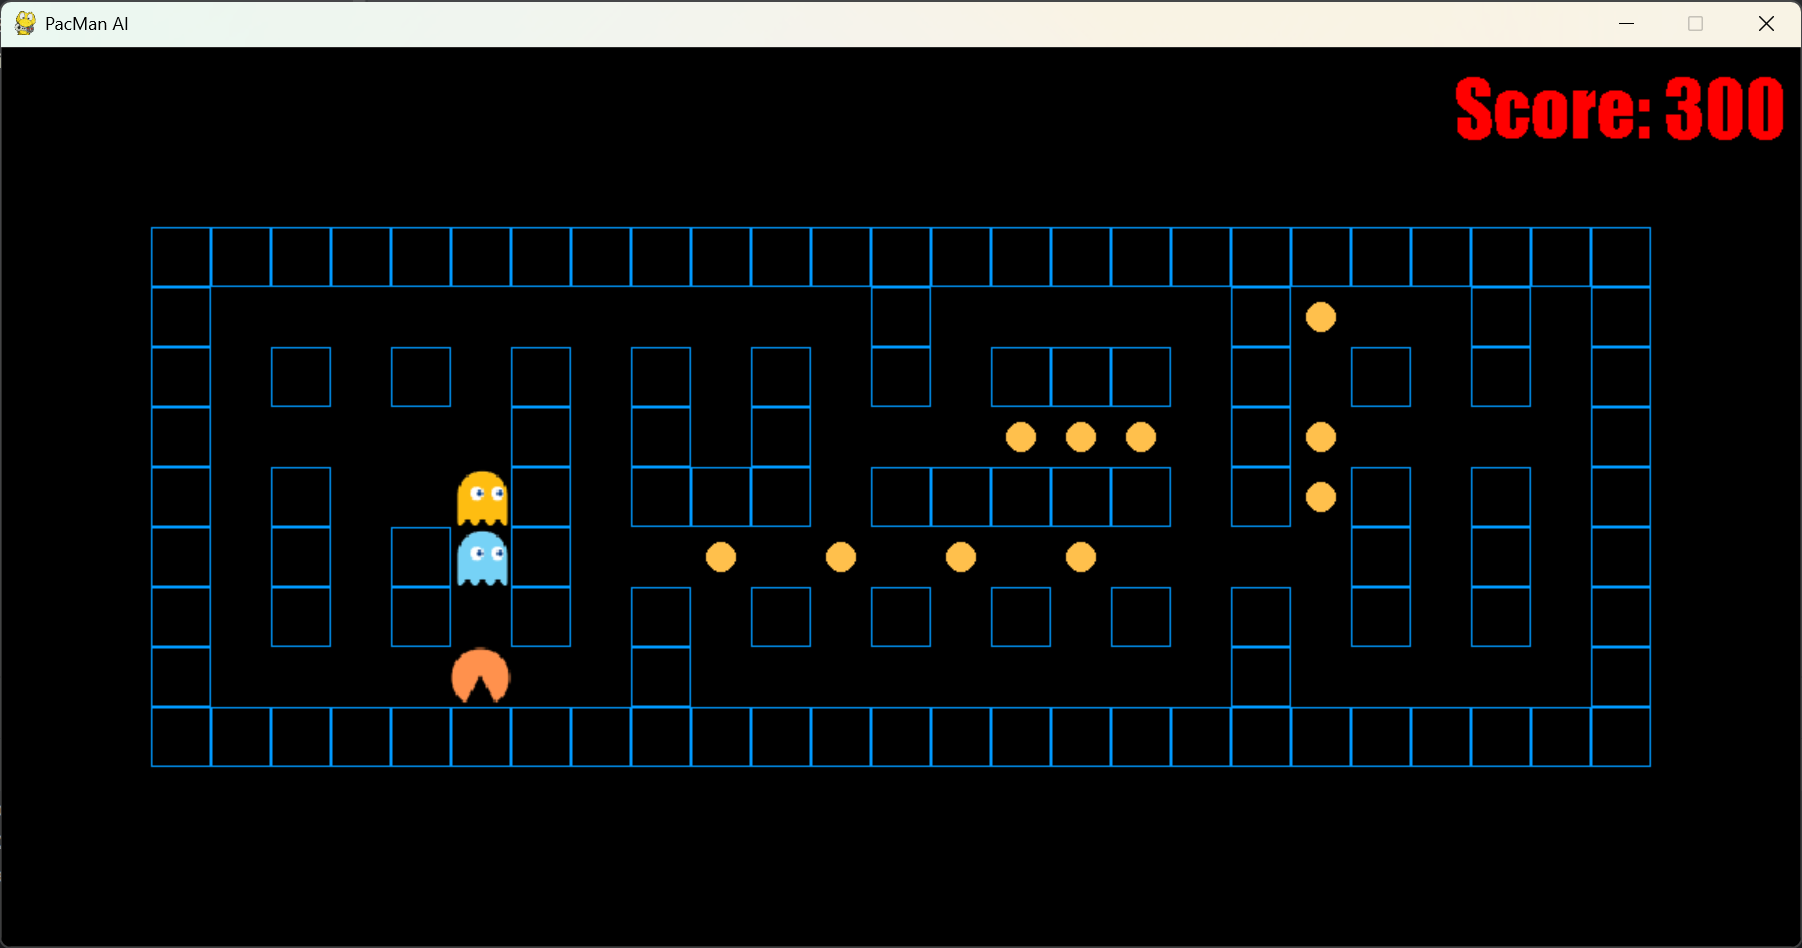

# Kết quả


Kết quả đo được

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu điểm số (score, is_lost)
scores_data = {
    "No Moving": {
        "BFS": [(839, False), (842, False), (858, False), (782, False), (801, False)],
        "Local Search": [(767, False), (825, False), (771, False), (580, False), (681, False)],
        "MINIMAX": [(-15, True), (-15, True), (-15, True), (-15, True), (-15, True)],
    },
    "Random Move": {
        "BFS": [(852, False), (482, True), (342, True), (672, True), (487, True)],
        "Local Search": [(611, False), (832, False), (838, False), (710, False), (552, False)],
        "MINIMAX": [(-15, True), (-15, True), (-15, True), (-15, True), (-15, True)],
    },
    "A* Move": {
        "BFS": [(107, True), (245, True), (53, True), (103, True), (103, True)],
        "Local Search": [(827, False), (711, True), (750, False), (455, True), (513, True)],
        "MINIMAX": [(833, False), (-15, True), (840, False), (774, False), (197, True)],
    }
}

map_labels = ["MAP 1", "MAP 2", "MAP 3", "MAP 4", "MAP 5"]
pacman_algos = ["BFS", "Local Search", "MINIMAX"]
ghost_strategies = ["No Moving", "Random Move", "A* Move"]

# Thiết lập màu sắc cho các thuật toán Pacman
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Xanh, Cam, Xanh lá
lost_marker = 'x'
lost_marker_color = 'red'

Plot kết quả

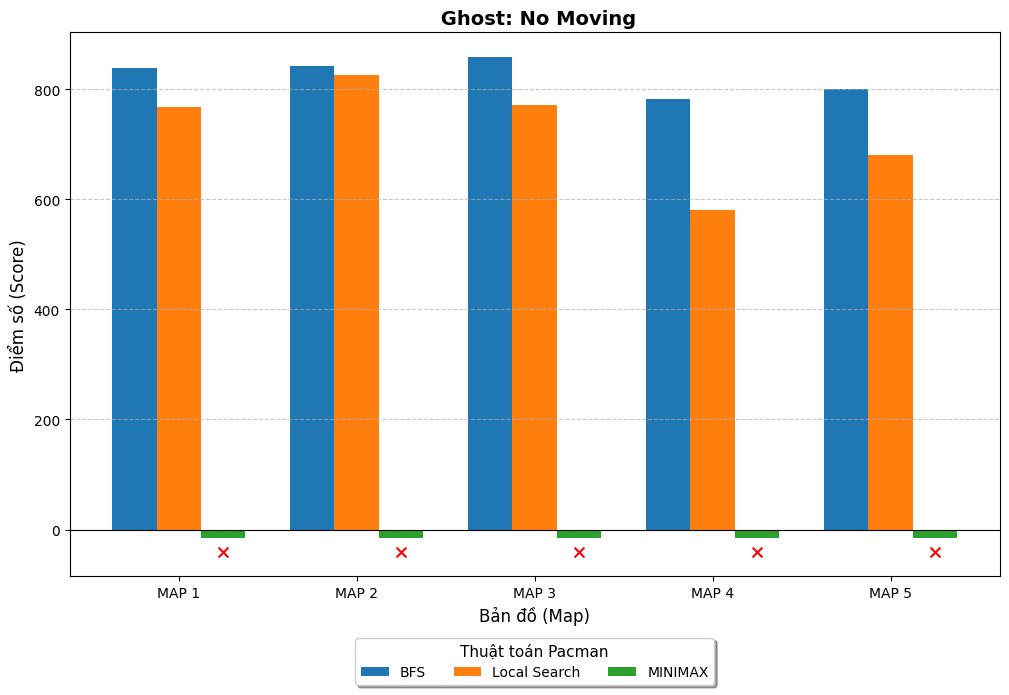

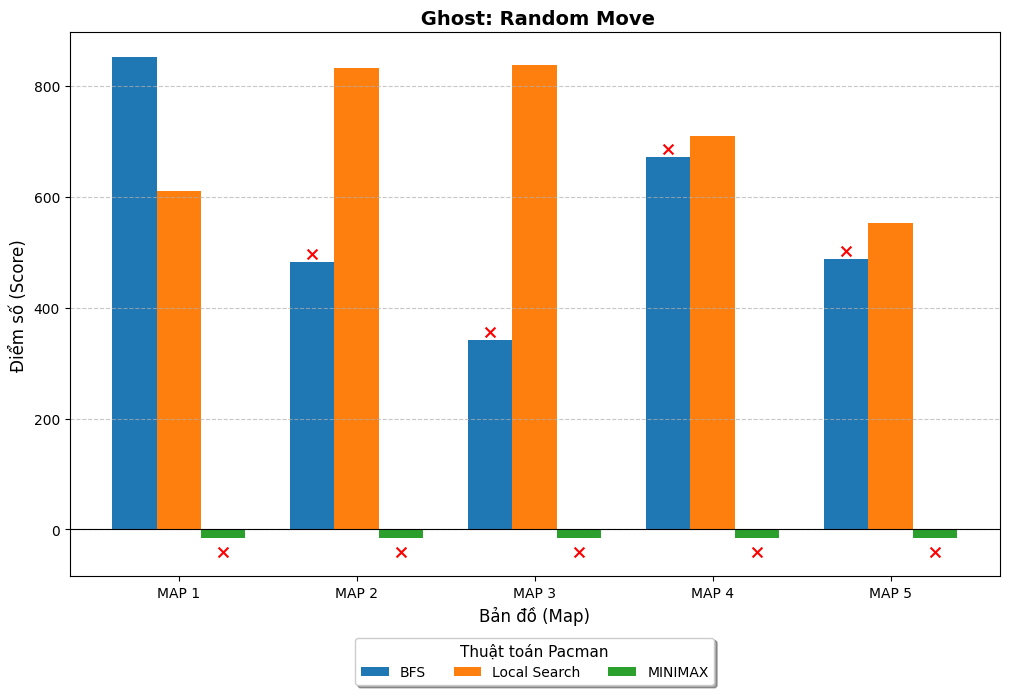

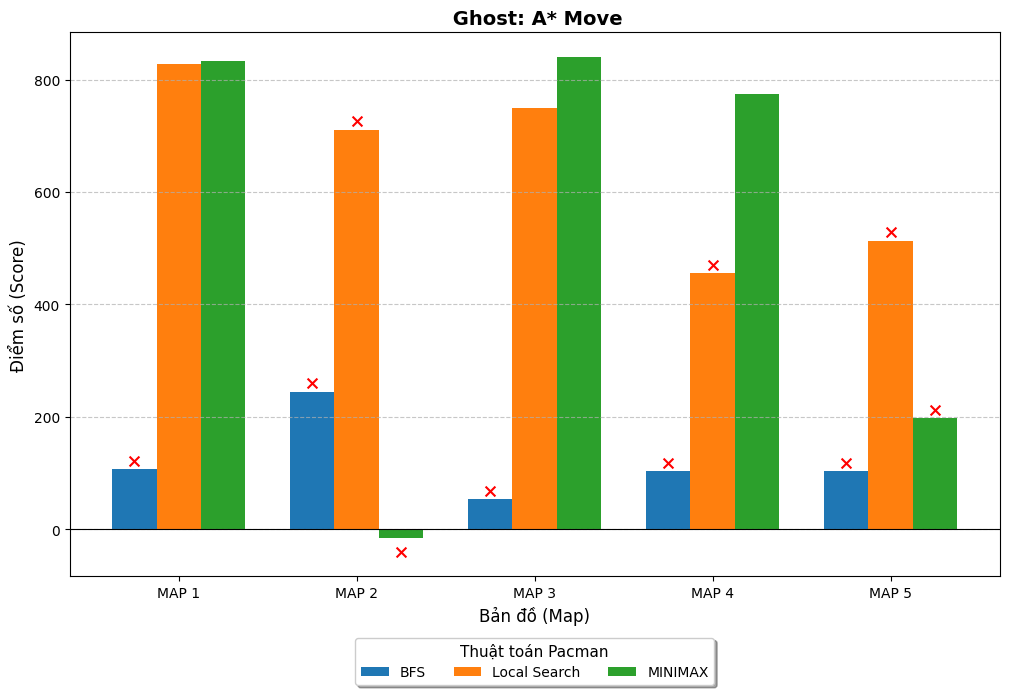

In [ ]:
# Tạo 3 biểu đồ riêng biệt
for i, ghost_strategy in enumerate(ghost_strategies):
    fig, ax = plt.subplots(figsize=(12, 8)) # Tăng chiều cao của figure để có không gian cho legend

    n_maps = len(map_labels)
    n_pacman_algos = len(pacman_algos)

    bar_width = 0.25 # Độ rộng của mỗi cột
    index = np.arange(n_maps) # Vị trí x cho các nhóm cột

    for j, pacman_algo in enumerate(pacman_algos):
        # Lấy dữ liệu điểm và trạng thái thua
        scores_with_status = scores_data[ghost_strategy][pacman_algo]
        scores = [s[0] for s in scores_with_status]
        is_lost_list = [s[1] for s in scores_with_status]

        # Vị trí của các cột cho thuật toán Pacman hiện tại
        bar_positions = index + (j - (n_pacman_algos - 1) / 2) * bar_width

        bars = ax.bar(bar_positions, scores, bar_width, label=pacman_algo, color=colors[j])

        # Đánh dấu các trường hợp "LOST"
        for k, bar in enumerate(bars):
            if is_lost_list[k]:
                y_val = bar.get_height()
                offset = 15 if y_val >= 0 else -25
                ax.scatter(bar.get_x() + bar.get_width() / 2, y_val + offset,
                           marker=lost_marker, color=lost_marker_color, s=50, zorder=3)

    ax.set_xlabel("Bản đồ (Map)", fontsize=12)
    ax.set_ylabel("Điểm số (Score)", fontsize=12)
    ax.set_title(f" Ghost: {ghost_strategy}", fontsize=14, fontweight='bold')
    ax.set_xticks(index)
    ax.set_xticklabels(map_labels, rotation=0, ha="center")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(0, color='black', linewidth=0.8)


    ax.legend(title="Thuật toán Pacman", title_fontsize='11', fontsize='10',
              loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=n_pacman_algos, fancybox=True, shadow=True)

    plt.subplots_adjust(bottom=0.2)
    plt.show()

# **Phân tích, đánh giá kết quả**
Với các kết quả như ở trên, cả **BFS** và **Minimax** đều tỏ ra chỉ hiệu quả trong các trường hợp đặc biệt còn thuật toán **Local Search** thì ổn định nhất.



1. **BFS**
  - **BFS** tìm đường ngắn nhất tới thức ăn, nhưng nếu ghost đeo bám thì Pacman dễ bị chạm trúng trước khi đến food vì **BFS** không hề xét đến nước đi của Ghost để tránh.

  - Với **No Moving** thì khi đó Ghost đứng yên nên Pacman đi thẳng đến thức ăn theo đường ngắn nhất .BFS khá hiệu quả trong trường hợp này.

  - Trong quá trình chạy thử với 2 thuật toán **A*** và **Random Move** của Ghost thì Pacman đều di chuyển bất chấp Ghost nên dễ dàng bị chạm vào Ghost do thuật toán không dự đoán trước đường đi của Ghost.


2. **Local Search**
  - Local Search cân bằng giữa tấn công (thu thập thức ăn) và phòng thủ (né Ghost) bởi vì có cơ chế visited-penalty + heuristic distance-to-ghost do đó đạt kết quả khá tốt và ổn định khi đối mặt với các Ghost di chuyển **ngẫu nhiên**.

  - Local Search depth-limited vision (depth = 3) đủ để quan sát và né Ghost chủ động. nên gần như không gặp tình trạng giống BFS mà vẫn tìm được đường đi tới Food.
  - Tuy nhiên do Local Search chỉ tìm kiếm cục bộ nên khi đối mặt với Ghost dùng A* thì dễ bị đi vào các ngõ cụt từ đó bị Ghost bắt.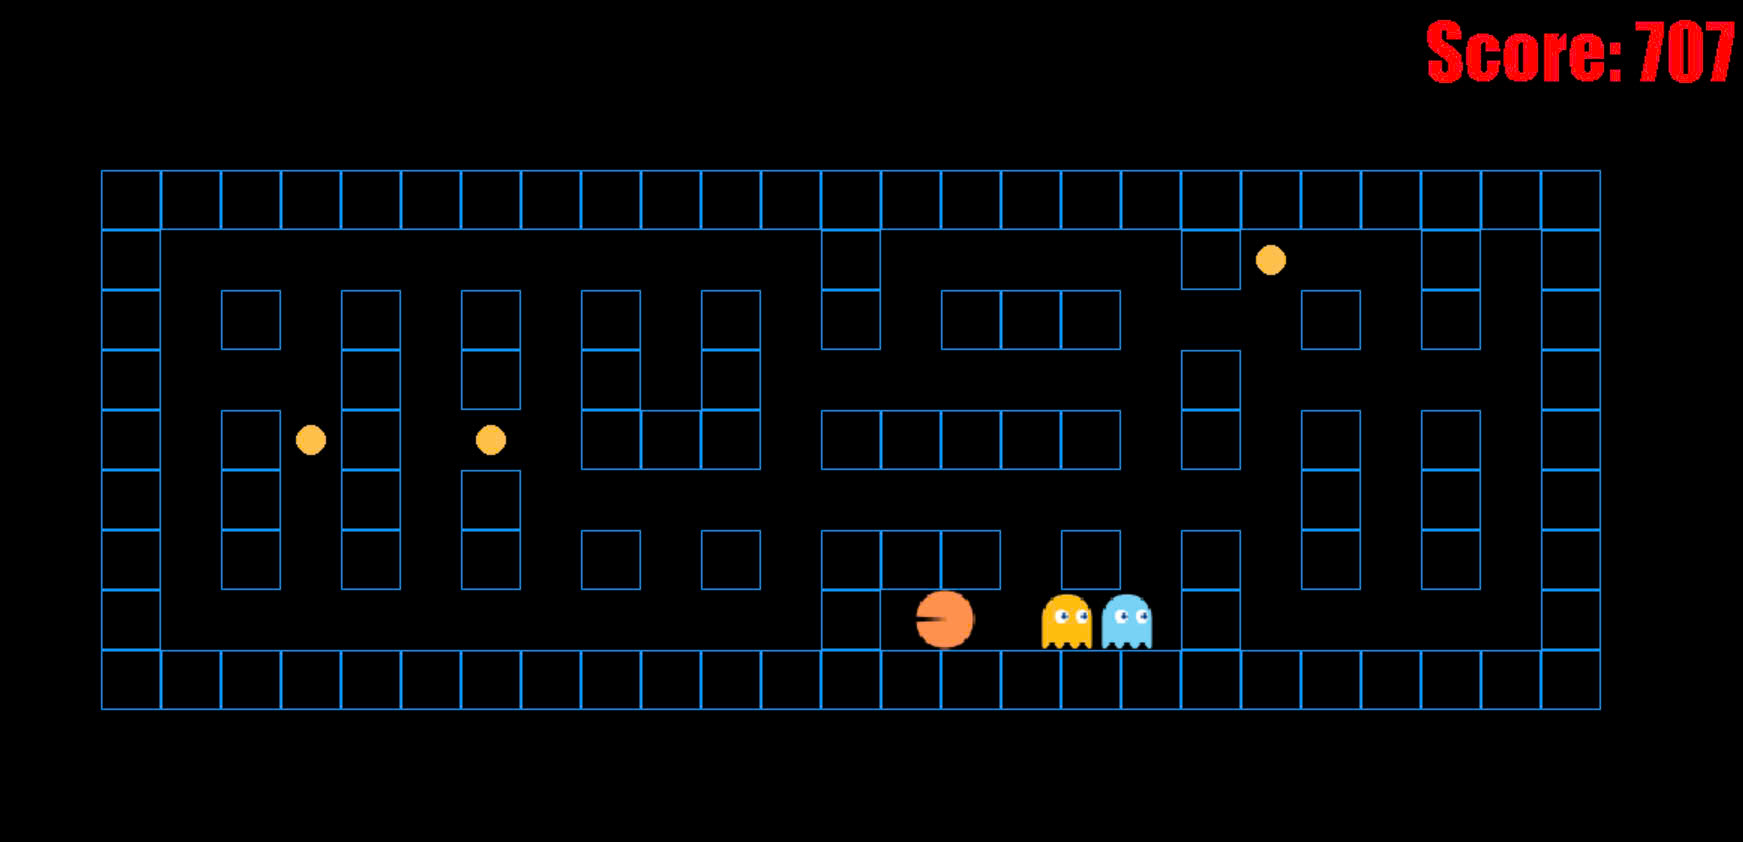


3. **Minimax**
  - Trong quá trình chạy thì Pacman di chuyển lặp lại khá nhiều với Minimax khi ghost là No Moving hoặc Random Move, bởi vì food và ghost đứng yên nên hàm **heuristic** luôn tính ra giá trị bằng nhau, dẫn tới Pacman bị lặp lại trong các nước đi:
    - Ghost No Moving: Không có sự thay đổi trong trạng thái, Minimax coi các nhánh đều cho giá trị đánh giá tương tự nên Pacman chọn đi/về giữa một vài ô dẫn tới các bước di chuyển bị vòng lặp vô hạn.

    - Ghost Random Move: Mặc dù ghost có khả năng di chuyển, nhưng khi đánh giá giả lập trong minimax, thuật toán lại giả sử ghost đi mọi hướng tối ưu nên hàm **heuristic** không phân biệt được dẫn tới Pacman vẫn bị di chuyển lặp lại nhiều ( vì ghost không đi bước tối ưu như dự tính ).

- Khi đối mặt với Ghost dùng A* thì nhìn chung Minimax xử lý khá tốt , vì đây là một thuật toán đối kháng .
- Tuy nhiên do Minimax thực hiện xét tất cả các trạng thái đi lần lượt của Pacman và Monster
nên  khi bản đồ có số hàng và số cột lớn hay số lượng Monster nhiều thì sẽ làm cho thuật
toán chạy chậm. Để thời gian chạy thuật toán là chấp nhận được (không bị giật lag) thì bọn e dùng thêm một biến depth=4 để giới hạn độ sâu của cây trò chơi.
- Tuy nhiên cũng vì thế sẽ có trường hợp Minimax rơi vào vòng lặp vĩnh cửu khi đối mặt với Ghost dùng A*.
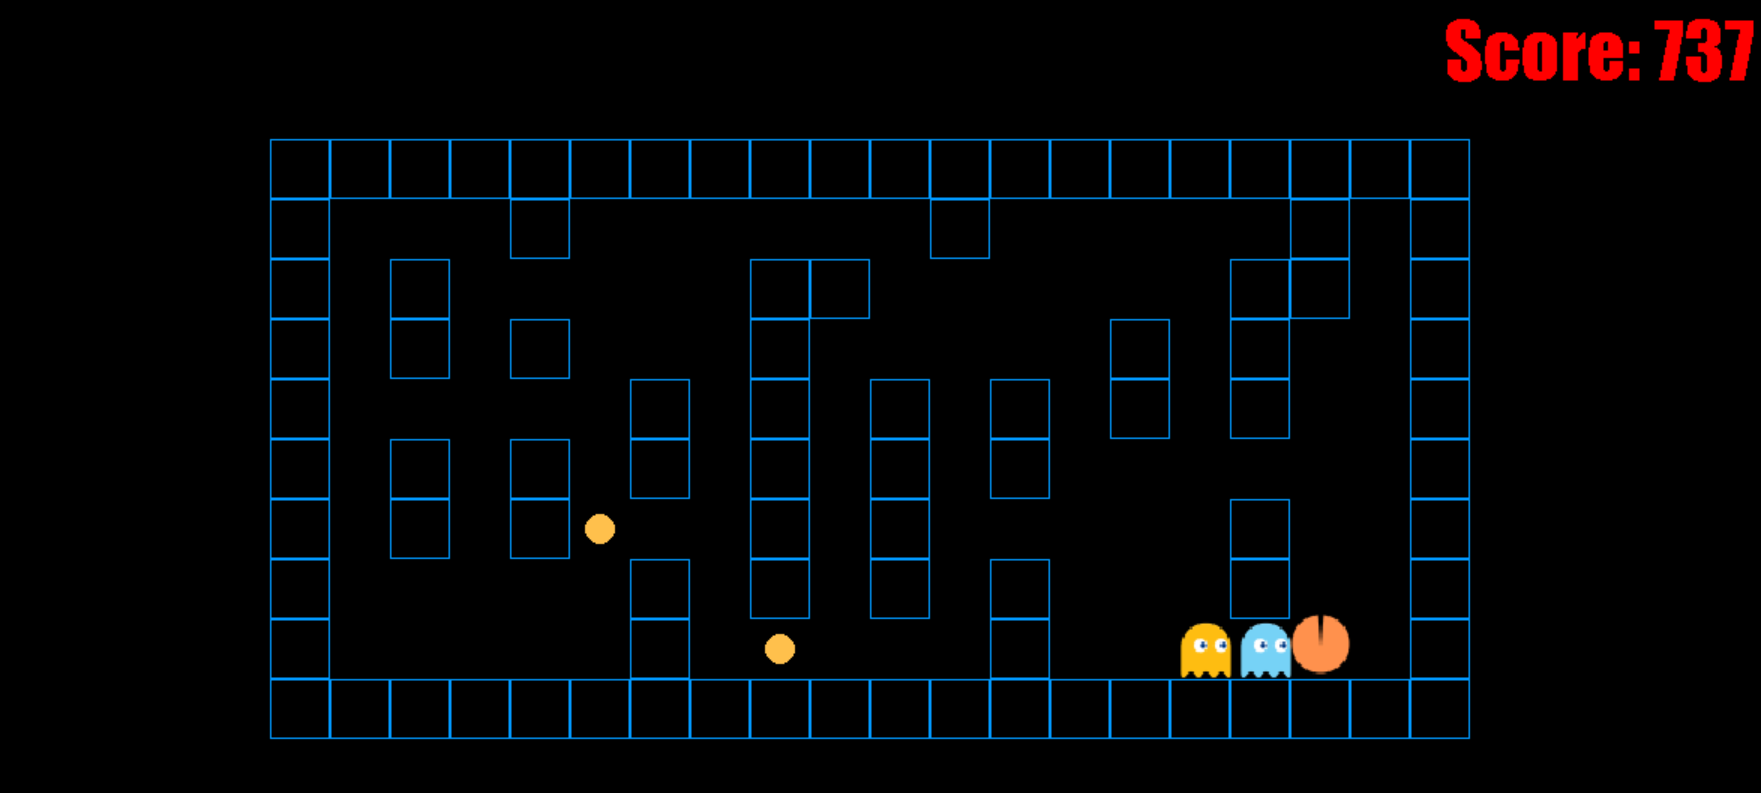

- Bên trên là một trường hợp khi Minimax rơi vào vòng lặp khi đối đầu với A* Ghost. Vì ở trường hợp này Pacman đã ăn hết các Food xung quanh và do giới hạn depth = 4 nên khi đó hàm minimax chỉ tính được Min để tránh được Ghost thôi mà không tính được Max .

# **Cập nhật phân công, khối lượng công việc**
<!-- công việc của các thành viên, tỷ lệ đóng góp của các thành viên -->


|                       	|                                               **Phân công**                                               	| **Đóng góp** 	|
|:---------------------:	|:---------------------------------------------------------------------------------------------------------:	|:------------:	|
|    **Phạm Quốc Minh** 	| Cài đặt thuật toán BFS cho Pacman, thiết kế cơ sở dữ liệu và cấu trúc game,làm báo cáo. 	|      24 %      	|
| **Nguyễn Thành Bách** 	| Cài đặt thuật toán Heuristic Local Search cho Pacman, xây dựng hệ thống điều khiển Pacman, làm báo cáo.          	|  29     %      	|
|      **Trịnh Hữu An** 	| Cài đặt thuật toán A* giúp Ghost đuổi theo Pacman, quản lý tiến độ dự án.                               	|     24  %      	|
|   **Lê Bá Ngọc Hiểu** 	| Cài đặt thuật toán Minimax cho Pacman, thiết kế UI/UX.                                                    	|     23  %      	|